In [117]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier as ab
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
cdf = df.copy()
cdf = cdf.drop(['Ticket', 'Name', 'Cabin', 'PassengerId', 'Embarked'], axis=1)
cdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
print('Before dropping NaNs:',cdf.shape)
cdf = cdf.dropna(axis=0, how='any')
print('After dropping NaNs:',cdf.shape)

Before dropping NaNs: (891, 7)
After dropping NaNs: (714, 7)


In [5]:
cdf['Sex'] = cdf['Sex'].apply({'male':0, 'female':1}.get).astype('category')
cdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [6]:
cdf_X, cdf_y = (cdf.drop(['Survived'], axis=1)), cdf['Survived']

In [7]:
cdf_X_train, cdf_X_test, cdf_y_train, cdf_y_test = train_test_split(cdf_X, cdf_y, test_size=0.2)

In [69]:
learningRates = np.arange(0.01, 0.3, 0.02)
numEstimators = np.arange(5, 400, 40,dtype=int)

### Adaboost

In [70]:
metrics = []
for lr in learningRates: 
    for ne in numEstimators: 
        tree_clf = ab(n_estimators=ne, learning_rate=lr)
        tree_clf.fit(cdf_X_train, cdf_y_train)
        train_acc = tree_clf.score(cdf_X_train, cdf_y_train)
        test_acc = tree_clf.score(cdf_X_test, cdf_y_test)
        metrics.append([lr, ne, train_acc, test_acc])

In [71]:
metrics = np.array(metrics)
best_metrics = metrics[np.argmax(metrics[:,3])]
best_metrics

array([  5.00000000e-02,   3.25000000e+02,   8.07355517e-01,
         8.18181818e-01])

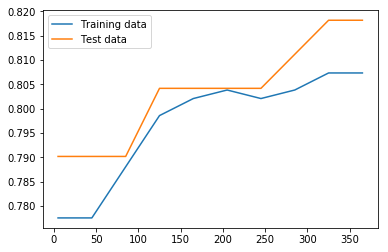

In [72]:
plot_data = metrics[metrics[:,0] == best_metrics[0]]
pp.plot(plot_data[:,1], plot_data[:,2], label="Training data")
pp.plot(plot_data[:,1], plot_data[:,3], label="Test data")
pp.legend()

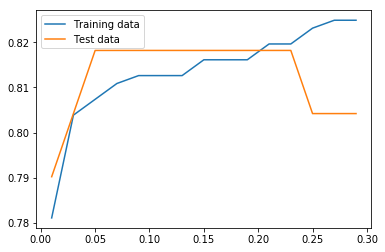

In [73]:
plot_data = metrics[metrics[:,1] == best_metrics[1]]
pp.plot(plot_data[:,0], plot_data[:,2], label="Training data")
pp.plot(plot_data[:,0], plot_data[:,3], label="Test data")
pp.legend()

In [86]:
tree_clf = ab(n_estimators=int(best_metrics[1]), learning_rate=best_metrics[0])
tree_clf.fit(cdf_X_train, cdf_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.049999999999999996, n_estimators=325,
          random_state=None)

In [103]:
tdf = pd.read_csv('test.csv')
tdf['Fare'] = tdf['Fare'].fillna(cdf[cdf['Pclass'] == 3]['Fare'].mean())
tdf['Age'] = tdf['Age'].fillna(cdf['Age'].mean())
tdf = tdf.drop(['Ticket', 'Name', 'Cabin', 'Embarked'], axis=1)
tdf.shape

(418, 7)

In [104]:
tdf['Sex'] = tdf['Sex'].apply({'male':0, 'female':1}.get).astype('category')
tdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [106]:
result = pd.DataFrame()
result['PassengerId'] = np.array(tdf['PassengerId'])
result['Survived'] = tree_clf.predict(tdf.drop(['PassengerId'], axis=1))
result.to_csv('result.csv', index=False)

### Decision Tree

In [119]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(cdf_X_train, cdf_y_train)
train_acc = tree_clf.score(cdf_X_train, cdf_y_train)
test_acc = tree_clf.score(cdf_X_test, cdf_y_test)
print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)

Train Accuracy:  0.987740805604
Test Accuracy:  0.762237762238


In [120]:
tdf = pd.read_csv('test.csv')
tdf['Fare'] = tdf['Fare'].fillna(cdf[cdf['Pclass'] == 3]['Fare'].mean())
tdf['Age'] = tdf['Age'].fillna(cdf['Age'].mean())
tdf = tdf.drop(['Ticket', 'Name', 'Cabin', 'Embarked'], axis=1)
tdf.shape

(418, 7)

In [121]:
tdf['Sex'] = tdf['Sex'].apply({'male':0, 'female':1}.get).astype('category')
tdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [122]:
result = pd.DataFrame()
result['PassengerId'] = np.array(tdf['PassengerId'])
result['Survived'] = tree_clf.predict(tdf.drop(['PassengerId'], axis=1))
result.to_csv('result.csv', index=False)

### Random Forest

In [131]:
tree_clf = RandomForestClassifier(max_depth=5, random_state=1)
tree_clf.fit(cdf_X_train, cdf_y_train)
train_acc = tree_clf.score(cdf_X_train, cdf_y_train)
test_acc = tree_clf.score(cdf_X_test, cdf_y_test)
print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)

Train Accuracy:  0.851138353765
Test Accuracy:  0.839160839161


In [113]:
tdf = pd.read_csv('test.csv')
tdf['Fare'] = tdf['Fare'].fillna(cdf[cdf['Pclass'] == 3]['Fare'].mean())
tdf['Age'] = tdf['Age'].fillna(cdf['Age'].mean())
tdf = tdf.drop(['Ticket', 'Name', 'Cabin', 'Embarked'], axis=1)
tdf.shape

(418, 7)

In [114]:
tdf['Sex'] = tdf['Sex'].apply({'male':0, 'female':1}.get).astype('category')
tdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [115]:
result = pd.DataFrame()
result['PassengerId'] = np.array(tdf['PassengerId'])
result['Survived'] = tree_clf.predict(tdf.drop(['PassengerId'], axis=1))
result.to_csv('result.csv', index=False)